## Importy

In [48]:
import random
import numpy as np
from statistics import mean
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Simulování spojité náhodné veličiny Y s rozdělením U(0, 1)

In [49]:
data = []
sampleSize = 200
for _ in range(sampleSize):
    data_point = random.random()
    data.append(data_point)

# Histogram

In [50]:
df = pd.DataFrame({"vals": data})
# df.set_axis(['sum_'], axis='columns', copy=False)
df

,vals
0,0.721438
1,0.826765
2,0.623788
3,0.146688
4,0.470122
...,...
195,0.271511
196,0.732079
197,0.099752
198,0.957524


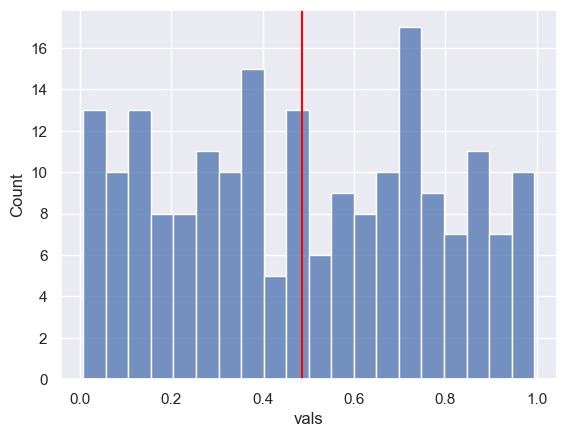

In [53]:
sns.set(style="darkgrid")
sns.histplot(data=df, x="vals", bins=20)
plt.axvline(x=df.vals.mean(), color='red')

# Střední hodnota

##### Střední hodnotu Y odhadneme tím, že najdeme průměr hodnot, kterých nabývá její empirická distribuce. 
##### Můžeme to udělat proto, že všechny hodnoty dostáváme se stejnou pravděpodobností, takže 

$\mathbb{E}(Y) = \int\limits_{-\inf}^{\inf}x \cdot f(x) dx \approx$
$ \sum\limits_{-\inf}^{\inf}val\cdot f(val) \text{ (pro vals} \in \text{ naměřená data)} = \frac{1}{\text{# naměřených dat}} \cdot \sum\limits_{\text{unique val }\in \text{ vals}}^{} \text{val} \cdot \text{#(val)}$

In [61]:
# E_approx = Přibližná střední hodnota
E_approx = 1/sampleSize * sum(df.vals) #jelikož se jedná o uniformní rozdělení
E_approx

0.4857773271429649

# Hustotní funkce

$F_y(0.4) = P(Y \leq 0.4) = \int\limits_{0}^{0.4} x \cdot f(x) dx \approx \frac{\text{#(vals<0.4)}}{\text{# all vals}}$ 

In [70]:
sum_ = sum(df.vals)
sum_leq = sum(filter(lambda x: x<=0.4, df.vals))
F_y = sum_leq/sum_
F_y

0.1829656062192791

# Náhodná veličina X

In [72]:
multi_inverse = []
for num in df.vals:
    multi_inverse.append(1/num)

In [74]:
df_x = pd.DataFrame({"vals": multi_inverse})
# df.set_axis(['sum_'], axis='columns', copy=False)
df_x

,vals
0,1.386121
1,1.209534
2,1.603110
3,6.817193
4,2.127109
...,...
195,3.683095
196,1.365973
197,10.024859
198,1.044360


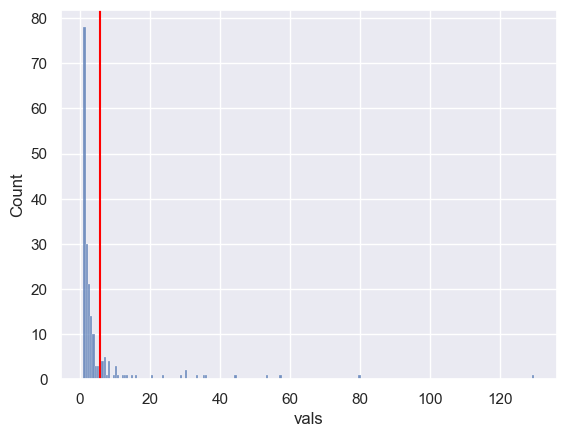

In [85]:
sns.set(style="darkgrid")
sns.histplot(data=df_x, x="vals", bins=200)
plt.axvline(x=df_x.vals.mean(), color='red')

# Střední hodnotu X odhadneme stejně jako Y

$\mathbb{E}(X) = \int\limits_{-\inf}^{\inf}x \cdot f(x) dx \approx$
$ \sum\limits_{-\inf}^{\inf}val\cdot f(val) \text{ (pro vals} \in \text{ naměřená data)} = \frac{1}{\text{# naměřených dat}} \cdot \sum\limits_{\text{unique val }\in \text{ vals}}^{} \text{val} \cdot \text{#(val)}$

In [82]:
# E_approx = Přibližná střední hodnota
E_x_approx = 1/sampleSize * sum(df_x.vals) #jelikož se jedná o uniformní rozdělení
E_x_approx

5.90058610859227

# P(2<=X<=3):
$F_y(0.4) = P(Y \leq 0.4) = \int\limits_{0}^{0.4} x \cdot f(x) dx \approx \frac{\text{#(vals<0.4)}}{\text{# all vals}}$ 

$P(2\leq X \leq 3) = F_X(3) - F_X(2)$
$= \int\limits_{-\inf}^{3} x \cdot f(x) dx - \int\limits_{-\inf}^{2} x \cdot f(x) dx \approx \frac{\text{#(2<=vals<=3}}{\text{# all vals}}$

In [84]:
sum_ = sum(df_x.vals)
sum_restricted = sum(filter(lambda x: x<=3, filter(lambda x: x>2, df_x.vals)))
F_X = sum_restricted/sum_
F_X

0.07737324375912187

## Matej 

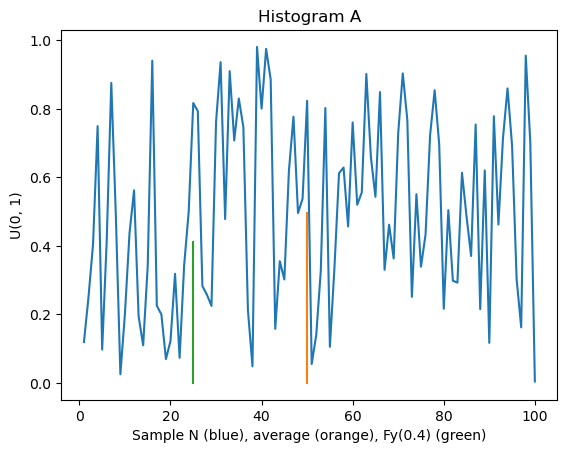

In [13]:
# osa x, 1.. sample size
x = list(range(1, sampleSize + 1))
# arit. průměr Y
a = sum(data) / len(data)
# P(Y < 0.4)
f04 = len(list(filter(lambda x: (x < 0.4), data))) / len(data)
# veličina X = převrácená hodnota Y (alt. np.reciprocal(data))
dataR = [1 / i for i in data]
# střední hodnota X
aR = sum(dataR) / len(dataR)
# P(2 <= X <= 3)
p =  len(list(filter(lambda x: (2 <= x and x <= 3), dataR))) / len(dataR)

plt.plot(x, data)
plt.plot([sampleSize / 2, sampleSize / 2], [0, a])
plt.plot([sampleSize / 4, sampleSize / 4], [0, f04])
plt.xlabel('Sample N (blue), average (orange), Fy(0.4) (green)')
plt.ylabel('U(0, 1)')
plt.title("Histogram A")
plt.show()

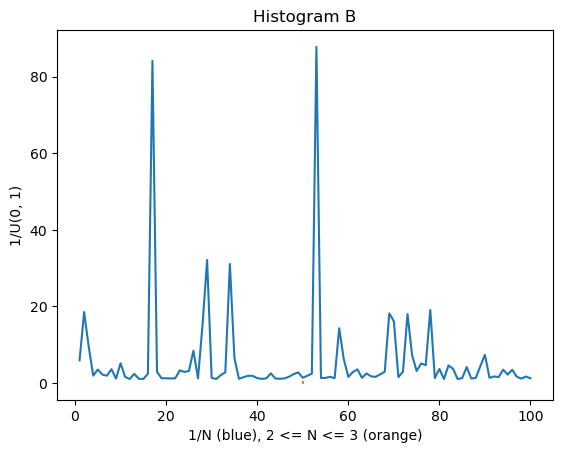

In [8]:
plt.plot(x, dataR)
plt.plot([sampleSize / 2, sampleSize / 2], [0, p])
plt.xlabel('1/N (blue), 2 <= N <= 3 (orange)')
plt.ylabel('1/U(0, 1)')
plt.title("Histogram B")
plt.show()

In [10]:
p # P(2 <= X <= 3)

0.17